**What tags generate the most views?**

In [1]:
## Imports for the whole section
import pandas as pd
from matplotlib import pyplot as plt
import json
import networkx as nx

In [8]:
## Read in data about tags
ted_main = pd.read_csv('data/ted_main.csv')
tags_deets = dict() # Dictionary containing tags as keys and total views, frequency tag is used as values

## Get all tags and their views and freq
# Loop through each talk and get/set tags data
for i in range(len(ted_main)):
    views = int(ted_main['views'][i]) # total views for that talk
    string_tags = [t.strip() for t in ted_main['tags'][i].strip().lower().replace("'", "")[1:-1].split(',')] # Array of tags for that talk
    for tag in string_tags:
        if tag not in tags_deets:
            tags_deets[tag] = {'views':0, 'freq':0, 'avg':0}
        # Set values for that tag
        tags_deets[tag]['views'] += views
        tags_deets[tag]['freq'] += 1

## Get average values for all tags *regardless of frequency*
tag_avg = {k:tags_deets[k]['views']/float(tags_deets[k]['freq']) for k in tags_deets.keys()}        

In [9]:
## Get top 10 averages of all keys
top_views = list()
for key, value in sorted(tag_avg.iteritems(), key=lambda (k,v): (v,k)):
    top_views.append([key, value])
top_views.reverse()
## Print out results
print "Tags with highest average views\n"
for i, (key, value) in enumerate(top_views):
    if i > 9: break
    print str(i+1) + ".) " + key + ": " + str(round(value, 2))

Tags with highest average views

1.) body language: 7993455.09
2.) testing: 6657858.0
3.) success: 6454556.61
4.) introvert: 6303975.6
5.) mindfulness: 4335876.6
6.) evil: 4283967.0
7.) dance: 4122717.16
8.) productivity: 4048263.35
9.) addiction: 4033930.2
10.) magic: 4021694.06


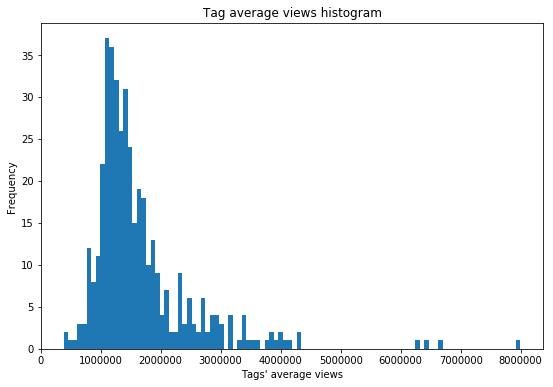

In [4]:
## Create histogram for the data
top_view_values = [top_views[i][1] for i in range(len(top_views))]
plt.figure(figsize=(9, 6))
plt.hist(top_view_values, 100)
plt.xlabel("Tags' average views")
plt.ylabel("Frequency")
plt.title("Tag average views histogram")
plt.show()

In [10]:
## Filter for tags that have a minimum of 5 different speeches
top_views_filtered = list()
filter_value = 5
for key, value in top_views:
    if tags_deets[key]['freq'] < filter_value: continue
    top_views_filtered.append([key, value])
## Print out results
print "Tags with highest average views with at least " + str(filter_value) + " tag instances\n"
for i, (key, value) in enumerate(top_views_filtered):
    if i > 9: break
    print str(i+1) + ".) " + key + ": " + str(round(value, 2))

Tags with highest average views with at least 5 tag instances

1.) body language: 7993455.09
2.) success: 6454556.61
3.) introvert: 6303975.6
4.) mindfulness: 4335876.6
5.) dance: 4122717.16
6.) productivity: 4048263.35
7.) addiction: 4033930.2
8.) magic: 4021694.06
9.) time: 3893878.59
10.) work-life balance: 3873959.5


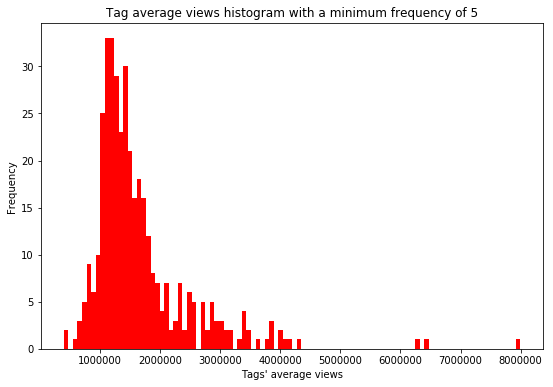

In [11]:
## Create another histogram
top_view_values_filtered = [top_views_filtered[i][1] for i in range(len(top_views_filtered))]
plt.figure(figsize=(9, 6))
plt.hist(top_view_values_filtered, 100, color="red")
plt.xlabel("Tags' average views")
plt.ylabel("Frequency")
plt.title("Tag average views histogram with a minimum frequency of " + str(filter_value))
plt.show()

Graph quick statistics
    Total nodes: 416
    Total edges: 22149
    Avg edge/node: 53.24


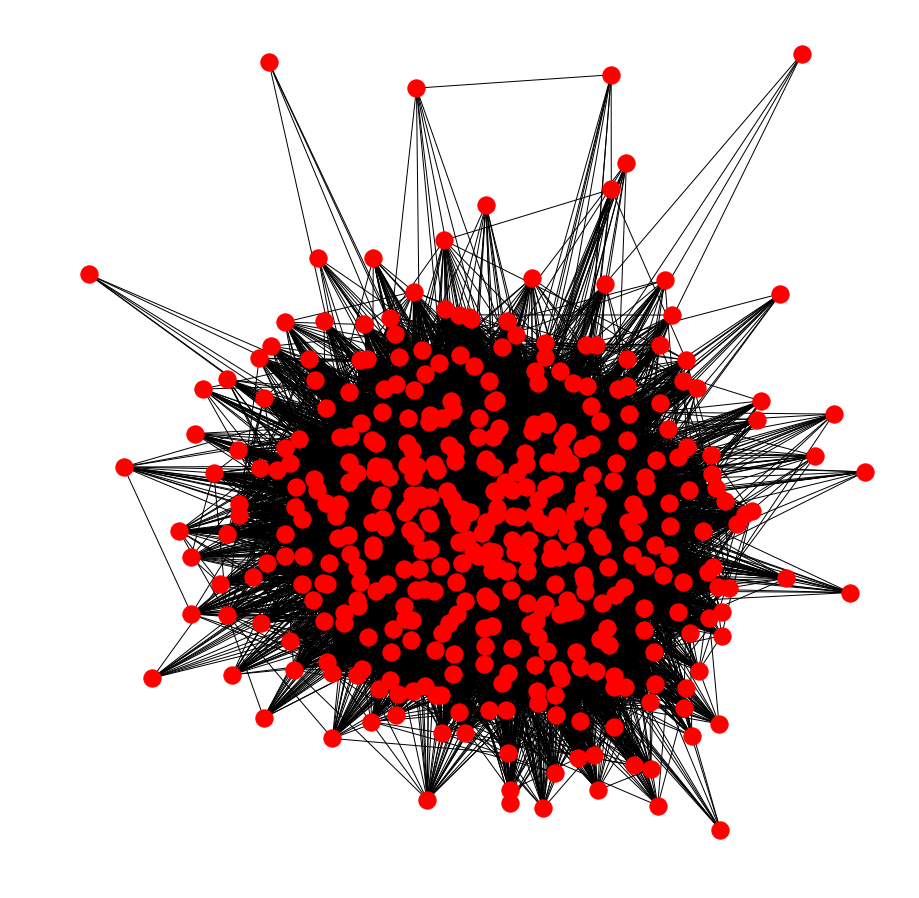

In [40]:
## Create network connecting tags
# an individual tag will be the nodes
# the edges will connect nodes if they appear in the same talk
tag_graph = nx.Graph()
# Make all nodes and then add edges
for i in range(len(ted_main)):
    # Properly format all tags from that talk into an array
    string_tags = [t.strip() for t in ted_main['tags'][i].strip().lower().replace("'", "")[1:-1].split(',')] # Array of tags for that talk
    # Add all tags as nodes to the graph
    tag_graph.add_nodes_from(string_tags)
    # Add edges for each tag to every other tag in that group
    for tag in string_tags:
        edges = [(tag, t) for t in string_tags if t != tag]
        tag_graph.add_edges_from(edges)
# Print stats about graph
print "Graph quick statistics"
print "    Total nodes: " + str(len(tag_graph.nodes))
print "    Total edges: " + str(len(tag_graph.edges))
print "    Avg edge/node: " + str(round(float(len(tag_graph.edges))/len(tag_graph.nodes), 2))

# Plot graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(tag_graph)
nx.draw(tag_graph, pos=pos)
plt.show()

In [67]:
## Print most connected tags out
top = 10
new_graph = list(reversed(sorted([(v,t) for t,v in nx.degree(tag_graph)])))
print "Most connected tags\n"
for i in range(top):
    print str(i+1) + ".) " + new_graph[i][1] + ": " + str(new_graph[i][0])

Most connected tags

1.) technology: 370
2.) tedx: 365
3.) science: 354
4.) innovation: 335
5.) global issues: 335
6.) society: 316
7.) culture: 316
8.) collaboration: 312
9.) future: 311
10.) humanity: 305


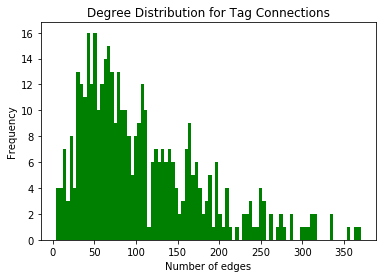

In [54]:
## Print out distribution of edges for hub detection
connections = [t[1] for t in nx.degree(tag_graph)]
plt.hist(connections, 90, color="green")
plt.title("Degree Distribution for Tag Connections")
plt.ylabel("Frequency")
plt.xlabel("Number of edges")
plt.show()

**Is there a formula for getting the most views?**

Regression model for bag of tags and other feature:
    Lasso regression - L1 re

** Recommender System **

Use sentinment for ratings for recommender system